<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [116]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

kParameters = np.zeros((10,256))
confMatrix = [[0 for x in range(10)] for i in range(10)]

In [117]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
def derivSigmoid(x):
  return x * (1 - x)

def mseLoss(y_true, y_pred):
  return ((y_pred - y_true) ** 2).mean()

def targetsSearch(data):
  predict = network.feedforward(data).T
  return np.array([np.argmax(x) for x in predict])

In [118]:
class NeuralNetwork:
  def __init__(self, k):
    # weights
    self.k = k

    # bias
    self.b1 = 0
    self.b2 = 0

    # loss
    self.loss = list()

    # prediction
    self.ypreds = list()
    
  def feedforward(self, data):
    h1 = sigmoid(self.k @ data) #+bias
    return h1

  def train(self, data, y_true):
        learn_rate = 0.00001
        epochs = 1000 
 
        for epoch in tqdm(range(epochs)):
            # backprop
            y_pred = self.feedforward(data)

            dL_dypred = 2 * (y_pred - y_true)

            # Neuron h1
            dh1_dk = derivSigmoid(y_pred) 

            """ Weights and bias updating """
            # Neuron h1
            self.k -= learn_rate * (dL_dypred * dh1_dk) @ data.T

            """ Loss calculation """
            self.loss.append(mseLoss(y_true, y_pred))

In [ ]:
network = NeuralNetwork(kParameters)
network.train(trainInputs, trainTargets)

In [120]:
targets = targetsSearch(testInputs)

for index in range(len(targets)):
  confMatrix[np.argmax(testTargets.T[index])][targets[index]] += 1

In [121]:
confMatrix

[[92, 2, 0, 0, 1, 1, 1, 0, 3, 0],
 [1, 83, 6, 1, 3, 1, 0, 0, 5, 0],
 [2, 0, 87, 2, 0, 0, 4, 1, 4, 0],
 [2, 0, 0, 89, 0, 4, 1, 0, 2, 2],
 [0, 1, 1, 0, 86, 0, 2, 1, 1, 8],
 [2, 0, 0, 9, 2, 86, 0, 0, 1, 0],
 [1, 3, 1, 0, 2, 0, 92, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 96, 0, 3],
 [1, 2, 3, 5, 1, 1, 0, 2, 81, 4],
 [0, 1, 1, 0, 6, 0, 0, 4, 1, 87]]

In [122]:
np.mean([confMatrix[i][i] for i in range(10)])

87.9

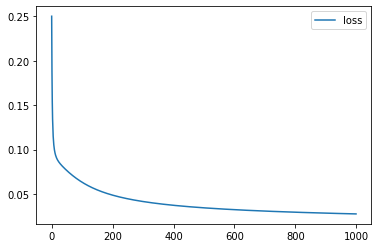

In [123]:
plt.plot(network.loss, label='loss')
plt.legend()